In [1]:
#1 import data/libraries
import random

import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
dataset = sklearn.datasets.fetch_openml("CIFAR_10_small", cache=True)

[[[155. 142. 134. ... 168. 166. 167.]
  [157. 161. 149. ... 158. 156. 146.]
  [143. 143. 141. ... 148. 148. 137.]
  ...
  [ 99. 157. 113. ... 119. 104. 125.]
  [116. 132. 106. ... 105.  96. 128.]
  [109. 105. 101. ... 113. 110. 148.]]

 [[147. 133. 123. ... 158. 156. 157.]
  [150. 155. 145. ... 151. 149. 138.]
  [127. 130. 132. ... 139. 137. 125.]
  ...
  [ 71. 130.  86. ... 104.  90. 106.]
  [ 89. 104.  78. ...  87.  76. 103.]
  [ 79.  70.  70. ...  85.  82. 120.]]

 [[129. 115. 111. ... 136. 136. 136.]
  [124. 128. 122. ... 132. 132. 123.]
  [107. 110. 112. ... 122. 122. 110.]
  ...
  [ 58. 112.  63. ...  67.  52.  66.]
  [ 73.  86.  65. ...  56.  50.  75.]
  [ 61.  54.  56. ...  47.  62.  94.]]]


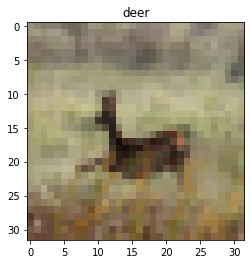

[[[199. 190. 193. ... 252. 252. 252.]
  [168. 168. 171. ... 246. 247. 246.]
  [160. 157. 160. ... 246. 246. 245.]
  ...
  [146. 143. 146. ...  52.  98. 143.]
  [142. 141. 144. ...  67. 116. 145.]
  [144. 140. 140. ...  97. 132. 144.]]

 [[209. 199. 202. ... 253. 253. 252.]
  [178. 178. 181. ... 247. 247. 246.]
  [168. 167. 169. ... 246. 246. 246.]
  ...
  [151. 146. 148. ...  53. 100. 145.]
  [149. 144. 146. ...  68. 116. 147.]
  [146. 144. 145. ...  96. 134. 145.]]

 [[233. 226. 230. ... 255. 255. 255.]
  [209. 207. 210. ... 254. 254. 253.]
  [201. 196. 198. ... 254. 253. 253.]
  ...
  [166. 161. 163. ...  55. 107. 160.]
  [163. 158. 161. ...  74. 128. 161.]
  [160. 157. 159. ... 107. 148. 160.]]]


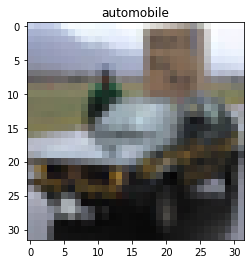

[[[ 72.  77.  78. ... 105. 107. 110.]
  [ 47.  46.  43. ...  60.  58.  66.]
  [ 69.  62.  56. ...  68.  66.  70.]
  ...
  [114. 112. 119. ... 117. 118. 121.]
  [116. 115. 115. ... 124. 124. 127.]
  [125. 125. 123. ... 126. 125. 128.]]

 [[104. 108. 108. ... 135. 137. 140.]
  [ 82.  80.  77. ...  98.  96. 104.]
  [102.  94.  89. ... 109. 108. 111.]
  ...
  [125. 123. 130. ... 132. 132. 137.]
  [127. 126. 127. ... 139. 139. 141.]
  [137. 136. 134. ... 141. 140. 143.]]

 [[ 86.  94.  95. ... 113. 115. 116.]
  [ 82.  82.  80. ...  85.  84.  89.]
  [ 97.  91.  89. ...  96.  95.  98.]
  ...
  [ 59.  56.  62. ...  67.  67.  71.]
  [ 58.  59.  59. ...  72.  72.  74.]
  [ 65.  69.  68. ...  72.  72.  74.]]]


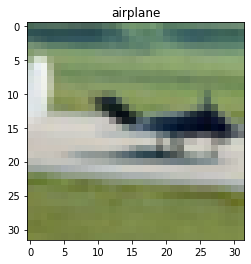

[[[183. 178. 178. ... 121. 121. 123.]
  [186. 181. 181. ... 123. 122. 125.]
  [183. 179. 180. ... 122. 121. 124.]
  ...
  [189. 186. 186. ... 122. 121. 124.]
  [191. 188. 187. ... 122. 122. 125.]
  [188. 185. 184. ... 121. 120. 123.]]

 [[231. 226. 224. ... 199. 199. 202.]
  [235. 229. 228. ... 202. 202. 205.]
  [232. 227. 227. ... 200. 200. 204.]
  ...
  [238. 233. 233. ... 200. 200. 204.]
  [240. 236. 235. ... 201. 202. 205.]
  [237. 232. 232. ... 199. 199. 202.]]

 [[242. 239. 240. ... 230. 229. 234.]
  [246. 242. 244. ... 233. 233. 237.]
  [243. 240. 243. ... 231. 231. 235.]
  ...
  [250. 245. 245. ... 231. 231. 235.]
  [252. 248. 248. ... 233. 233. 237.]
  [249. 244. 244. ... 230. 229. 233.]]]


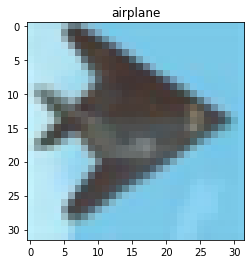

[[[157. 183. 196. ... 231. 241. 246.]
  [139. 160. 173. ... 219. 232. 239.]
  [125. 135. 149. ... 210. 227. 234.]
  ...
  [136. 154. 160. ... 106. 106. 103.]
  [112. 136. 144. ...  96. 100. 101.]
  [ 94. 117. 130. ...  97. 101. 103.]]

 [[157. 183. 196. ... 234. 245. 250.]
  [139. 161. 174. ... 222. 236. 243.]
  [126. 136. 150. ... 213. 232. 238.]
  ...
  [136. 153. 161. ... 103. 107. 105.]
  [114. 137. 144. ...  97. 103. 103.]
  [ 96. 118. 130. ...  99. 104. 105.]]

 [[157. 183. 197. ... 241. 250. 253.]
  [137. 158. 172. ... 229. 241. 246.]
  [121. 131. 145. ... 220. 237. 241.]
  ...
  [135. 156. 165. ...  91.  92.  90.]
  [103. 131. 142. ...  82.  86.  89.]
  [ 86. 111. 126. ...  85.  89.  93.]]]


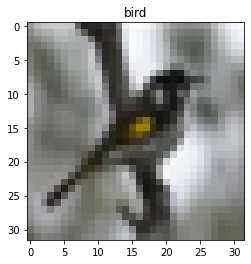

In [3]:
for i in range(5):
    rand = random.randrange(0,20000,1)
    data = dataset["data"].iloc[rand].tolist()
    classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    classifications = dataset["target"].iloc[rand]
    data = np.array(data)
    #print(data)
    data = data.reshape(3, 32, 32)
    im = np.transpose(data, axes=[1, 2, 0])
    im = np.uint8(im)
    #print(data)
    #print(img)
    #img = np.array(img)
    plt.imshow(Image.fromarray(im))
    plt.title(classNames[int(classifications)])
    plt.show()


In [7]:
train_img, test_img, train_lbl, test_lbl = train_test_split(dataset.data, dataset.target, test_size= .25, random_state=0)
test_img.shape


(5000, 3072)